## Build the random forest model after normalizing the variable to house pricing from boston data set.


In [1]:
# import necessary liabries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import datasets 

In [2]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target
features['PRICE'] = targets
boston_data = pd.DataFrame(features)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

No Missing the values great!  

###### Visualizing Data

Plot the correlation heatmap

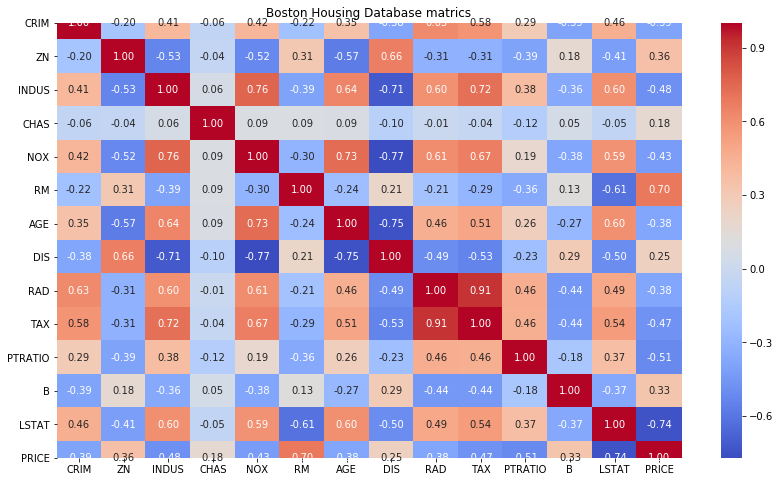

In [12]:
corr =boston_data.corr()

fig_size = plt.figure(figsize= (14,8))

#Generate the heat map,allow annotations and place floats in map
sns.heatmap(corr,cmap= 'coolwarm',annot=True , fmt ='.2f')
plt.title('Boston Housing Database matrics')
plt.show()

Observation :
RAD and TAX are highly correlated with each other(correlation score :0.92).
. and a couple of feature which are somewhat correlated with one another with a correlation score around 0.70(INDUS and TAX,NOX and INDUS , AGE and INDUS).


                                              

sns.pairplot(boston_data)
plt.show()

In [5]:
### Splitting the dataset into the training set and Test set
X = boston_data.iloc[:,0:13]
y = boston_data.iloc[:,13]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [8]:
rf_prediction = regressor_rf.predict(X_test)

from sklearn.metrics import r2_score
print("Test accuracy :", format(metrics.r2_score(y_test,rf_prediction)*100,'.2f'))
print("Mean squared Error :",format(metrics.mean_squared_error(y_test,rf_prediction),'.5f'))

Test accuracy : 80.55
Mean squared Error : 13.26883


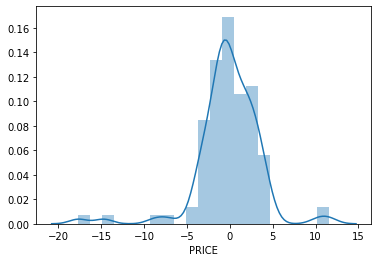

In [9]:
sns.distplot(y_test-rf_prediction)

#### Here the residuals are normally distributed. So normality assumption is satisfied

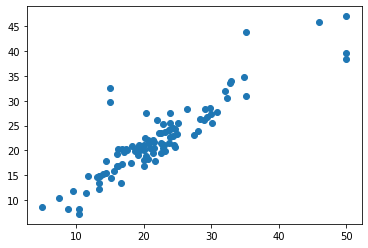

In [10]:
plt.scatter(y_test,rf_prediction)

In [11]:

y_rf_pred1 = regressor_rf.predict(X_train)

from sklearn.metrics import r2_score

r2_score_rf = r2_score(y_train, y_rf_pred1)
r2_score_rf1 =r2_score(y_test, rf_prediction)
print('R2 score (train): ',r2_score_rf)
print('r2 score (test) :', r2_score_rf1)


R2 score (train):  0.9778673357640507
r2 score (test) : 0.8054575668741146
